# Logistic Growth

A symbolic solution to the well-known logistic equation to model population growth. In the example below we will compute the first adn second derivative of the function and we will find the inflection point.

$$ f(x) = \frac{L}{1+e^{-k(x-x_0)}}$$


x$_0$ = x-coordinate of the inflection point, the x-value of the sigmoid's midpoint

$L$ = maximum value or carrying capacity

$k$ = growth rate


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy


In [2]:
L = 10
x0 = 10
k = 1
x = sympy.symbols('x')
sigmoid_expr = L / (1+sympy.exp(-k*(x-x0)))


In [3]:
# Convert symbolic expression of sigmoid function to lambda function
f_sigmoid = sympy.lambdify(x, sigmoid_expr, 'numpy')


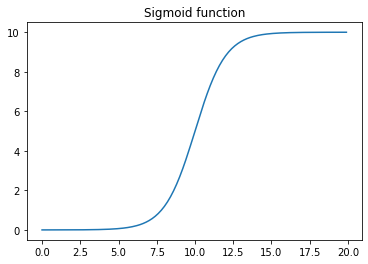

In [4]:
# Plot graph of sigmoid function
lower_xlim = 0
upper_xlim = 20
step = 0.1
xvec = np.arange(lower_xlim,upper_xlim, step)
yvec = f_sigmoid(xvec)

plt.figure()
plt.plot(xvec,yvec)
plt.title('Sigmoid function')
plt.show()


In [5]:
# Compute symbolic expression for first derivative of sigmoid function
sigmoid_expr_prime = sympy.diff(sigmoid_expr, x, 1)
print(sigmoid_expr_prime)


10*exp(10 - x)/(exp(10 - x) + 1)**2


In [7]:
# Convert symbolic expression of sigmoid first derivative to lambda function
f_sigmoid_prime = sympy.lambdify(x, sigmoid_expr_prime, 'numpy')


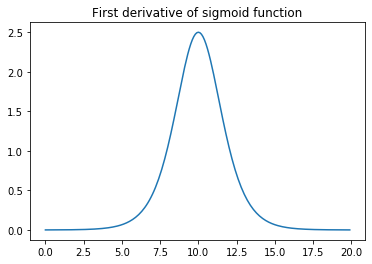

In [8]:
# Plot graph of first derivative of sigmoid function
yvec_prime = f_sigmoid_prime(xvec)

plt.figure()
plt.plot(xvec,yvec_prime)
plt.title('First derivative of sigmoid function')
plt.show()


In [9]:
# Compute second derivative of sigmoid function
sigmoid_expr_twoprime = sympy.diff(sigmoid_expr, x, 2)
print(sigmoid_expr_twoprime)


-10*(exp(10 - x) - 2*exp(20 - 2*x)/(exp(10 - x) + 1))/(exp(10 - x) + 1)**2


In [11]:
# Convert symbolic expression of sigmoid second derivative to lambda function
f_sigmoid_twoprime = sympy.lambdify(x, sigmoid_expr_twoprime, 'numpy')


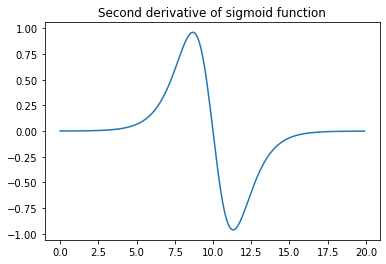

In [12]:
# Plot graph of second derivative of sigmoid function

yvec_twoprime = f_sigmoid_twoprime(xvec)

plt.figure()
plt.plot(xvec,yvec_twoprime)
plt.title('Second derivative of sigmoid function')
plt.show()


In [13]:
# Let's compute some practical values from all this work
idx_highest_slope = np.argmax(yvec_prime)
x_highest_slope = xvec[idx_highest_slope]
y_highest_slope = yvec[idx_highest_slope]

# Positive acceleration
idx_highest_accel_pos = np.argmax(yvec_twoprime)
x_highest_accel_pos = xvec[idx_highest_accel_pos]
y_highest_accel_pos = yvec[idx_highest_accel_pos]

# Negative acceleration
idx_highest_accel_neg = np.argmin(yvec_twoprime)
x_highest_accel_neg = xvec[idx_highest_accel_neg]
y_highest_accel_neg = yvec[idx_highest_accel_neg]


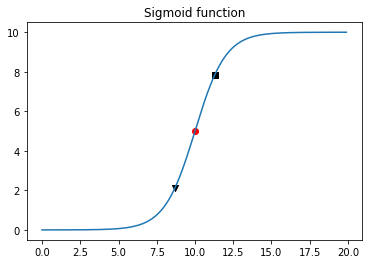

In [14]:
# Plot sigmoid function with metrics
plt.figure()
plt.plot(xvec,yvec)
plt.scatter(x_highest_slope, y_highest_slope, marker='o', color='r')
plt.scatter(x_highest_accel_pos, y_highest_accel_pos, marker='v', color='k')
plt.scatter(x_highest_accel_neg, y_highest_accel_neg, marker='s', color='k')
plt.title('Sigmoid function')
plt.show()


## Observations

- The first derivative was useful to identify the part of fastest growth rate.

- The second derivatives are usually know as acceleration, but in this context the two resulting points seem to be quite useful to objectively determine the portion of the curve that exhibits linear growth (part between the black triangle and the black square).

- Do you see any use for the third derivative?


## References

Logistic equation in Wikipedia: <https://www.wikiwand.com/en/Logistic_function>
